<a href="https://colab.research.google.com/github/CinthiaLuna/PracticasSa/blob/master/SistDist2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resumen semana 1
Debimos saber:
* Como se "guarda" información en la cmputadora, uso de memoria

In [3]:
import numpy as np 
import pandas as pd
import psutil, os

def huella_de_memoria():
  '''Regresa la memoria usada por un proceso en python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem /1024**2)

antes = huella_de_memoria()
x**2
despues = huella_de_memoria()
print('Memoria asignada por')

'Aqui falta un poco de codigo'

In [0]:
df = pd.DataFrame(x)

#Semana 2
comenzaremos descargando los datos
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [4]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

--2019-05-14 15:53:10--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.1.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.1.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772098307 (736M) [text/csv]
Saving to: ‘yellow_tripdata_2018-01.csv’

yellow_tripdata_201 100%[===================>] 736.33M  44.3MB/s    in 17s     

2019-05-14 15:53:27 (42.9 MB/s) - ‘yellow_tripdata_2018-01.csv’ saved [772098307/772098307]



In [5]:
ls

sample_data/  yellow_tripdata_2018-01.csv


In [6]:
ls -l

total 754012
drwxr-xr-x 1 root root      4096 May  8 16:22 sample_data/
-rw-r--r-- 1 root root 772098307 Aug  3  2018 yellow_tripdata_2018-01.csv


In [7]:
!wc -l yellow_tripdata_2018-01.csv

8759876 yellow_tripdata_2018-01.csv


* Programa para descargar toda la base de taxis del 2018 para automatizar la descarga

In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv' + plantilla


In [0]:
'''Creada con for'''
for y in range(1,13):
  print(plantillaURL.format(y))

In [0]:
'''Creada con listas'''
comandos =[plantillaURL.format(y) for y in range (1,13)]

In [12]:
comandos

['wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-01.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-02.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-03.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-04.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-05.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-06.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-07.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-08.csv',
 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csvyellow_tripdata_2018-09.csv',
 'wget https://s3.amazonaws.com/nyc-t

In [13]:
'''Para realizar un generador de objetos que se manda a traer el espacio de memoria siempre y cuando se utilices'''
(plantillaURL.format(y) for y in range (1,13))

<generator object <genexpr> at 0x7f362971bd58>

In [0]:
#vamos a descargar los datos usando la instruccion en la lista de comandos
comandos = [plantillaURL.format(y) for y in range (1,4)]
for cmd in comandos:
  os.system(cmd)

In [78]:
ls

sample_data/  yellow_tripdata_2018-01.csv


#Accediendo a los datos con pandas

In [0]:
archivo = 'yellow_tripdata_2018-01.csv'

In [0]:
df = pd.read_csv(archivo)

In [24]:
df.memory_usage(index = False) / (1024**2)

VendorID                 66.832535
tpep_pickup_datetime     66.832535
tpep_dropoff_datetime    66.832535
passenger_count          66.832535
trip_distance            66.832535
RatecodeID               66.832535
store_and_fwd_flag       66.832535
PULocationID             66.832535
DOLocationID             66.832535
payment_type             66.832535
fare_amount              66.832535
extra                    66.832535
mta_tax                  66.832535
tip_amount               66.832535
tolls_amount             66.832535
improvement_surcharge    66.832535
total_amount             66.832535
dtype: float64

In [25]:
sum(df.memory_usage(index =False)/(1024**2))

1136.153091430664

ponemos la lectura en trozos para poder ocupar menos memoria

In [28]:
for trozo in pd.read_csv(archivo, chunksize=50000):
  print('type: %s shape %s'%(type(trozo), trozo.shape))

type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
type: <c

In [29]:
trozo.shape

(9874, 17)

In [30]:
trozo.info

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8750000         2  2018-01-31 23:36:22   2018-01-31 23:46:11                1   
8750001         1  2018-01-31 23:41:34   2018-01-31 23:45:40                2   
8750002         1  2018-01-31 23:26:35   2018-01-31 23:29:48                2   
8750003         1  2018-01-31 23:15:56   2018-01-31 23:16:09                1   
8750004         1  2018-01-31 23:17:26   2018-01-31 23:17:42                1   
8750005         1  2018-01-31 23:18:24   2018-01-31 23:18:24                1   
8750006         1  2018-01-31 23:01:11   2018-01-31 23:26:10                3   
8750007         1  2018-01-31 23:36:10   2018-01-31 23:47:24                1   
8750008         2  2018-01-31 23:04:06   2018-01-31 23:17:09                2   
8750009         2  2018-01-31 23:24:14   2018-01-31 23:42:17                2   
8750010         2  2018-01-31 23:50:30   2018-02-01 00:09:31                2

In [31]:
trozo.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750000,2,2018-01-31 23:36:22,2018-01-31 23:46:11,1,1.8,1,N,162,186,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
8750001,1,2018-01-31 23:41:34,2018-01-31 23:45:40,2,1.0,1,N,234,79,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
8750002,1,2018-01-31 23:26:35,2018-01-31 23:29:48,2,0.6,1,N,234,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8750003,1,2018-01-31 23:15:56,2018-01-31 23:16:09,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
8750004,1,2018-01-31 23:17:26,2018-01-31 23:17:42,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


##TAREA HACER UN FILTRADO DE LO QUE VAMOS A HACER A CONTINUACIÓN CON LOS DATOS TOTALES

Defiinimos una condiccion de `es_un_viaje_largo` si el valor en la columna de `trip_distance`es mayor a 10(milla,approx 16km)

In [32]:
es_un_viaje_largo = (trozo.trip_distance > 10)
es_un_viaje_largo.head()

8750000    False
8750001    False
8750002    False
8750003    False
8750004    False
Name: trip_distance, dtype: bool

In [35]:
trozo.loc[es_un_viaje_largo].shape

(431, 17)

Encapsular la operación de filtrado realizada anteriormente en una función 

In [0]:
def filtra_es_un_viaje_largo(data):
  es_un_viaje_largo =(data.trip_distance > 10)
  return data.loc[es_un_viaje_largo]

In [0]:
trozosFiltrados = []
for trozo in pd.read_csv(archivo, chunksize = 500000):
  trozosFiltrados.append(filtra_es_un_viaje_largo(trozo))

In [39]:
len(trozosFiltrados)

18

Es conveniente utilizar una *comprension de lista* para generar la lista anterior

In [41]:
trozos =[filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000)]
len(trozos)

18

In [42]:
tamanos = [len(trozo) for trozo in trozos]
tamanos

[36840,
 24360,
 27249,
 32064,
 26497,
 27405,
 23502,
 30812,
 25838,
 24353,
 22569,
 30044,
 24992,
 24950,
 22277,
 27423,
 23822,
 11817]

In [43]:
np.mean(tamanos)

25934.11111111111

vamos a concatenar todos estos trozos en una nueva estructura de datos `DataFrame`, 

Dicha estructura debera tener un tamaño de?



In [44]:
sum(tamanos)

466814

In [46]:
viajes_largos_df = pd.concat(trozos)
viajes_largos_df.shape

(466814, 17)

Ahora vamos a visualizar parte  de los datos filtrados

In [0]:
import matplotlib.pyplot as plt

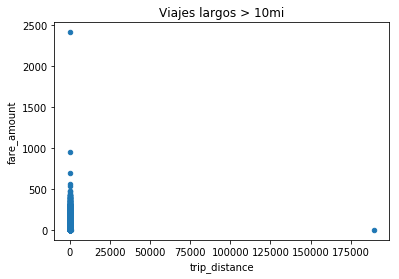

In [49]:
viajes_largos_df.plot.scatter(x='trip_distance', y='fare_amount', title='Viajes largos > 10mi')

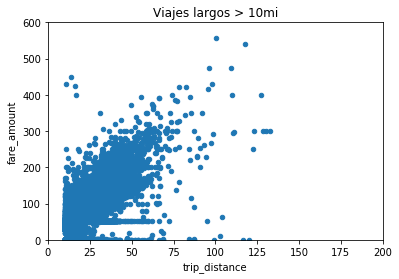

In [53]:
viajes_largos_df.plot.scatter(x='trip_distance', y='fare_amount', title='Viajes largos > 10mi', xlim=(0,200), ylim=(0,600));

##TAREA REALIZAR LAS MISMAS OPERACIONES QUE VAMOS HACERLO CON LOS DEMAS DATOS


In [55]:
trozos =(filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))
trozos

<generator object <genexpr> at 0x7f3604afee60>

##TAREA CUAL ES LA HUELLA DE MEMORIA DEL GENERADOR ANTERIOR?
MEDIR HUELLA DE MEMORIA ANTES 
GENERO TROZOS 
VUELVO A MEDISO HUELLA DE MEMORIA

In [0]:
distancias = (trozo['trip_distance'].sum() for trozo in trozos)

In [57]:
sum(distancias)

7339629.629999999

vamos a leer muchos archivos

In [0]:
df = pd.read_csv('yellow_tripdata_2018-01.csv', parse_dates =[1,2])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [60]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [0]:
def cuenta_viajes_tardados(df):
  df['duracion'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200 
  result_dict ={'n_long': [sum(es_viaje_tardado)],
                'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

In [0]:
archivos = [plantilla.format(y) for y in range(1,4)]

In [0]:
dataframes= (pd.read_csv(archivo, parse_dates=[1,2]) for archivo in archivos)

In [0]:
totales = (cuenta_viajes_tardados(df) for df in dataframes)

In [76]:
totales_trimestrales = sum(totales)

FileNotFoundError: ignored

In [79]:
print (totales_trimestrales)

sample_data/  yellow_tripdata_2018-01.csv


In [0]:
totales_trimestrales['n_long'] /totales_trimestrales['n_total']

###Repetir los paso y contamos el tiempo con import time 
cual es la huella de memoria con genradores y con listas
y ver la huella de memoria del proceso antes y despues 
reportaos 3 meses 6 12 y asi